# **BT thực hành 4.3: Gradient Descent - Dự đoán doanh thu phim**

> Cập nhật: **07/2023**



---
## **Yêu cầu 1: Hồi quy tuyến tính bằng hàm của sklearn**
##### BoxOffice một tạp chí phim ảnh ra đời từ năm 1920 và là một tên tuổi lớn trong lĩnh vực đầu tư, thương mại và sản xuất phim. Có một vấn đề đặt ra khi chuẩn bị xây dựng một bộ phim là liệu bộ phim này có mang về lợi nhuận ? Thông tin này rất quý giá cho những nhà đầu tư.
- Đọc các tập tin **cost_revenue_dirty.csv** và **cost_revenue_clean.csv** vào dataframe
- Chọn input X = df[['production_budget_usd']] và output y = df['worldwide_gross_usd']
- Sử dụng linear_model.LinearRegression()
- Biểu diễn trực quan dữ liệu
- Cho biết số tiền đầu tư (Production Budget) và số tiền thu về (Worldwide Gross) của bộ phim Avata
- Dự đoán cho bộ phim Avata và in ra kết quả dự đoán được
---

In [1]:
## Môi trường lập trình
from google.colab import drive
drive.mount("/content/gdrive", force_remount = True)
folder = '/content/gdrive/My Drive/Colab Notebooks/LDS3/Thuc hanh/Ch4_Calculus'

Mounted at /content/gdrive


In [2]:
## Thư viện
import matplotlib.pyplot as plt
import numpy             as np
import pandas            as pd
import warnings
warnings.filterwarnings('ignore')

from sklearn             import linear_model

In [3]:
## Mở tập tin dữ liệu
df_dirty = pd.read_csv(folder + '/Data/cost_revenue_dirty.csv')

## Xem thông tin
df_dirty.shape

(5391, 6)

In [4]:
## Xem dữ liệu
##    Production Budget ($): kinh phí đầu tư
##    Domestic Gross ($)   : doanh thu trong nước
##    Worldwide Gross ($)  : doanh thu về trên toàn thế giới
df_dirty.head()

,Rank,Release Date,Movie Title,Production Budget ($),Worldwide Gross ($),Domestic Gross ($)
0,5293,8/2/1915,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,"$385,907",$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5222,1/1/1925,The Big Parade,"$245,000","$22,000,000","$11,000,000"


In [5]:
## Đọc tập tin cost_revenue_clean.csv vào dataframe
df = pd.read_csv(folder + '/Data/cost_revenue_clean.csv')

## Xem thông tin
df.shape

(5034, 2)

In [6]:
## Xem dữ liệu
print(df.head())

   production_budget_usd  worldwide_gross_usd
0                1000000                   26
1                  10000                  401
2                 400000                  423
3                 750000                  450
4                  10000                  527


In [7]:
## Mô hình hóa dữ liệu: Input X, Output y
X = df[['production_budget_usd']]
y = df['worldwide_gross_usd']

In [8]:
## Hồi quy tuyến tính
regr = linear_model.LinearRegression()
regr.fit(X, y)

LinearRegression()

In [9]:
## Phương trình đường thẳng (không gian 2D): y = m.x + b
slope = regr.coef_[0]
bias  = regr.intercept_
print('Phương trình hồi quy tuyến tính:')
print('   y = (', slope, ') * X + (', bias, ')')

Phương trình hồi quy tuyến tính:
   y = ( 3.1115091829361265 ) * X + ( -7236192.729139581 )


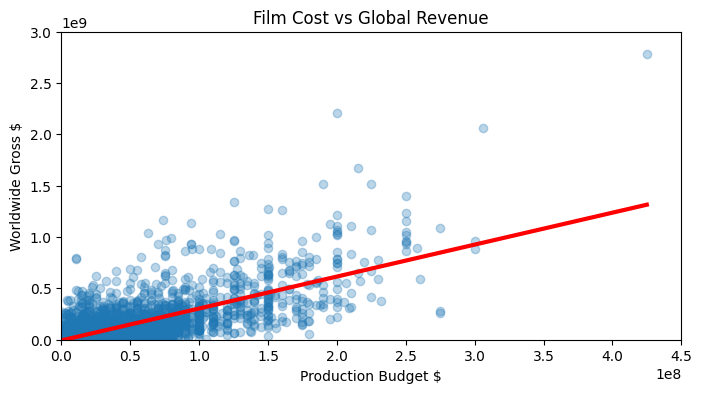

In [10]:
## Biểu diễn trực quan dữ liệu
plt.figure(figsize = (8, 4))
plt.scatter(X, y, alpha = 0.3)

plt.plot(X, regr.predict(X), color = 'red', linewidth = 3)

plt.title('Film Cost vs Global Revenue')
plt.xlabel('Production Budget $')
plt.ylabel('Worldwide Gross $')
plt.ylim(0, 3000000000)
plt.xlim(0, 450000000)
plt.show()

In [11]:
## Thông tin của film Avatar
avatar = df_dirty[df_dirty['Movie Title'] == 'Avatar'].reset_index()
avatar

,index,Rank,Release Date,Movie Title,Production Budget ($),Worldwide Gross ($),Domestic Gross ($)
0,3529,1,12/18/2009,Avatar,"$425,000,000","$2,783,918,982","$760,507,625"


In [12]:
## Dự đoán doanh thu phim Avatar
X_pred = [[425000000]]
y_pred = regr.predict(X_pred)
print('Dự đoán doanh thu:', '${:,}'.format(y_pred[0]))
print('Doanh thu thực tế:', avatar.loc[0,'Worldwide Gross ($)'])

Dự đoán doanh thu: $1,315,155,210.0187142
Doanh thu thực tế: $2,783,918,982
